# Teacher Workforce Analysis: State-Level Deep Dive & Validation

## Overview
This notebook validates and expands on the initial finding that apparent teacher workforce losses during COVID were primarily due to data reporting gaps rather than actual workforce exodus. We'll conduct state-level analysis to identify true patterns and policy implications.

## Key Questions
- Which states drove the apparent 169K teacher loss vs. actual ~6K loss?
- What are the most significant state-level workforce changes (2016-2024)?
- How did COVID impact different states differently?
- Which states show genuine growth vs. decline patterns?

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully")

Libraries loaded successfully


In [3]:
import os

# Load the cleaned teacher workforce dataset
data_files = [f for f in os.listdir('.') if f.endswith(('.csv', '.xlsx', '.json'))]
print(f"Available data files: {data_files}")

Available data files: []


In [4]:
# Check current working directory and find data files
print(f"Current directory: {os.getcwd()}")
print("\nAll files in directory:")
for file in os.listdir('.'):
    print(f"  {file}")

Current directory: /Users/meredithbannon/teacher-shortage-analysis

All files in directory:
  .DS_Store
  README.md
  02_state_level_deep_dive.ipynb.ipynb
  .ipynb_checkpoints
  venv
  .git
  data
  outputs
  notebooks
  01_teacher_data_exploration.ipynb
  src


In [5]:
# Check data directory contents
print("Files in data/ directory:")
for file in os.listdir('./data'):
    print(f"  {file}")
    
print("\nFiles in outputs/ directory:")
for file in os.listdir('./outputs'):
    print(f"  {file}")

Files in data/ directory:
  staff_2015-16.xlsx
  .DS_Store
  staff_2014-15.txt
  staff_2021-22.txt
  staff_2023-24.txt
  staff_2017-18.txt
  staff_2019-20.txt
  staff_2016-17.csv
  staff_companion_2022-23.xlsx
  staff_companion_2014-15.xlsx
  staff_2018-19.txt
  staff_2020-21.txt
  staff_companion_2023-24.xlsx
  staff_2022-23.txt

Files in outputs/ directory:
  state_teacher_workforce_changes.png
  national_teacher_trend_linkedin.png


In [6]:
# Check notebooks directory for processed datasets
print("Files in notebooks/ directory:")
for file in os.listdir('./notebooks'):
    print(f"  {file}")

# Review previous analysis notebook structure
print(f"\nPrevious analysis notebook: 01_teacher_data_exploration.ipynb")

Files in notebooks/ directory:

Previous analysis notebook: 01_teacher_data_exploration.ipynb


In [7]:
# Double-check exact filenames in data directory
data_files = os.listdir('./data')
txt_files = [f for f in data_files if f.endswith('.txt')]
print("Text files found:")
for f in txt_files:
    print(f"  {f}")

# Try loading the first txt file to understand structure
if txt_files:
    first_file = f'./data/{txt_files[0]}'
    print(f"\nTrying to read: {first_file}")
    
    with open(first_file, 'r') as file:
        print("First 5 lines:")
        for i, line in enumerate(file):
            if i < 5:
                print(line.strip())
            else:
                break

Text files found:
  staff_2014-15.txt
  staff_2021-22.txt
  staff_2023-24.txt
  staff_2017-18.txt
  staff_2019-20.txt
  staff_2018-19.txt
  staff_2020-21.txt
  staff_2022-23.txt

Trying to read: ./data/staff_2014-15.txt
First 5 lines:
SURVYEAR	FIPST	STABR	STATENAME	SEANAME	SCHSUP	SECTCH	STAFF	ELMGUI	KGTCH	LEASUP	PARA	SECGUI	CORSUP	ELMTCH	LIBSUP	SCHADM	STUSUP	GUI	LEAADM	LIBSPE	OTHSUP	PKTCH	UGTCH	TOTTCH	TOTGUI	ISCHSUP	ISECTCH	ISTAFF	IELMGUI	IKGTCH	ILEASUP	IPARA	ISECGUI	ICORSUP	IELMTCH	ILIBSUP	ISCHADM	ISTUSUP	IGUI	ILEAADM	ILIBSPE	IOTHSUP	IPKTCH	IUGTCH	ITOTTCH	ITOTGUI
2014-2015	01	AL	ALABAMA	Alabama Department Of Education	2593.71	20076.30	87453.51	962.96	4760.82	753.65	6199.56	647.26	182.03	17240.17	278.87	3837.05	3079.38	33.13	770.14	983.50	24395.48	659.50	-2.00	42736.79	1643.35	R	R	R	R	R	R	R	R	R	R	R	R	R	R	R	R	R	R	A	T	T
2014-2015	02	AK	ALASKA	Alaska Department of Education and Early Development	1058.47	3501.81	17087.79	65.53	449.12	788.87	2476.55	190.48	203.00	3662.21	78.81	645.04	613.18

In [8]:
# Debug the file path issue
import os

# Check if the files actually exist and their types
data_dir = './data'
print("Detailed file info in data directory:")

for item in os.listdir(data_dir):
    full_path = os.path.join(data_dir, item)
    if os.path.isfile(full_path):
        print(f"FILE: {item}")
    elif os.path.isdir(full_path):
        print(f"DIRECTORY: {item}")
    else:
        print(f"OTHER: {item}")

# Try a different approach - check file sizes
print(f"\nFile sizes:")
for item in os.listdir(data_dir):
    full_path = os.path.join(data_dir, item)
    if os.path.isfile(full_path):
        size = os.path.getsize(full_path)
        print(f"{item}: {size:,} bytes")

Detailed file info in data directory:
FILE: staff_2015-16.xlsx
FILE: .DS_Store
FILE: staff_2014-15.txt
DIRECTORY: staff_2021-22.txt
DIRECTORY: staff_2023-24.txt
DIRECTORY: staff_2017-18.txt
DIRECTORY: staff_2019-20.txt
FILE: staff_2016-17.csv
FILE: staff_companion_2022-23.xlsx
FILE: staff_companion_2014-15.xlsx
DIRECTORY: staff_2018-19.txt
DIRECTORY: staff_2020-21.txt
FILE: staff_companion_2023-24.xlsx
DIRECTORY: staff_2022-23.txt

File sizes:
staff_2015-16.xlsx: 28,947 bytes
.DS_Store: 8,196 bytes
staff_2014-15.txt: 15,268 bytes
staff_2016-17.csv: 177,438 bytes
staff_companion_2022-23.xlsx: 38,822 bytes
staff_companion_2014-15.xlsx: 649,381 bytes
staff_companion_2023-24.xlsx: 41,850 bytes


In [9]:
# Load the actual data files (not the directories)
# Start with the CSV file which is likely the largest/most complete
df_2016 = pd.read_csv('./data/staff_2016-17.csv')

print(f"2016-17 data shape: {df_2016.shape}")
print(f"\nColumn names:")
print(df_2016.columns.tolist())

print(f"\nFirst few rows - key columns:")
# Look for teacher-related columns
teacher_cols = [col for col in df_2016.columns if 'TCH' in col.upper() or 'TEACH' in col.upper()]
print(f"Teacher-related columns: {teacher_cols}")

if 'TOTTCH' in df_2016.columns:
    print(f"\nTotal teachers by state (top 10):")
    state_totals = df_2016.groupby('STATENAME')['TOTTCH'].sum().sort_values(ascending=False).head(10)
    print(state_totals)

2016-17 data shape: (1405, 10)

Column names:
['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SEA_NAME', 'STATE_AGENCY_NO', 'STAFF', 'STAFF_COUNT', 'TOTAL_INDICATOR', 'DMS_FLAG']

First few rows - key columns:
Teacher-related columns: []


In [10]:
# Examine the CSV structure more closely
print("Unique values in STAFF column:")
print(df_2016['STAFF'].value_counts())

print(f"\nSample rows:")
print(df_2016.head(10))

print(f"\nData types:")
print(df_2016.dtypes)

# Check if this is disaggregated data that needs to be filtered for teachers
if 'STAFF' in df_2016.columns:
    teacher_rows = df_2016[df_2016['STAFF'].str.contains('teach', case=False, na=False)]
    print(f"\nRows containing 'teach': {len(teacher_rows)}")
    if len(teacher_rows) > 0:
        print(teacher_rows['STAFF'].value_counts())

Unique values in STAFF column:
STAFF
All Other Support Staff                                    57
Elementary School Counselors                               57
Elementary Teachers                                        57
Instructional Coordinators and Supervisors to the Staff    57
Kindergarten Teachers                                      57
LEA Administrative Support Staff                           57
LEA Administrators                                         57
Librarians/media specialists                               57
Library/Media Support Staff                                57
Missing                                                    57
Paraprofessionals/Instructional Aides                      57
Pre-kindergarten Teachers                                  57
School Administrative Support Staff                        57
School administrators                                      57
School Counselors                                          57
Secondary School Counselors      

In [11]:
# Based on the file list, identify which files likely contain the 8 years of consistent data
available_files = {
    'staff_2014-15.txt': 'file',
    'staff_2015-16.xlsx': 'file', 
    'staff_2016-17.csv': 'file',
    'staff_companion_2022-23.xlsx': 'file',
    'staff_companion_2014-15.xlsx': 'file',
    'staff_companion_2023-24.xlsx': 'file'
}

print("Available actual data files:")
for file, type_info in available_files.items():
    print(f"  {file}")

# The 2016-17 CSV might be processed data from your previous analysis
print(f"\nLet's check if the 2016-17 CSV contains processed/combined data:")
print(f"Unique years in SCHOOL_YEAR: {sorted(df_2016['SCHOOL_YEAR'].unique())}")
print(f"Unique states: {len(df_2016['STATENAME'].unique())} states")
print(df_2016['STATENAME'].unique()[:10])  # First 10 states

Available actual data files:
  staff_2014-15.txt
  staff_2015-16.xlsx
  staff_2016-17.csv
  staff_companion_2022-23.xlsx
  staff_companion_2014-15.xlsx
  staff_companion_2023-24.xlsx

Let's check if the 2016-17 CSV contains processed/combined data:
Unique years in SCHOOL_YEAR: ['2016-2017']
Unique states: 57 states
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA']


In [12]:
# Check if there's a processed/combined dataset from previous analysis
# Look for any saved outputs or processed data

# First, check for any other CSV files or processed data
print("Checking for processed datasets...")

# Check if previous notebook created any output files
import json
import nbformat

# Try to read previous notebook to see what datasets it created
try:
    with open('01_teacher_data_exploration.ipynb', 'r') as f:
        nb = nbformat.read(f, as_version=4)
    
    # Look for cells that save data
    save_patterns = ['to_csv', 'to_excel', 'save', 'export']
    
    print("Found data saving operations in previous notebook:")
    for i, cell in enumerate(nb.cells):
        if cell.cell_type == 'code':
            for pattern in save_patterns:
                if pattern in cell.source:
                    print(f"Cell {i}: {cell.source[:100]}...")
                    break
                    
except Exception as e:
    print(f"Could not read previous notebook: {e}")
    print("Will need to reconstruct the combined dataset")

Checking for processed datasets...
Found data saving operations in previous notebook:
Cell 28: # Teacher Workforce Trends Analysis (2016-2024)
# Analysis of national and state-level patterns in t...


In [13]:
# Examine the previous notebook more thoroughly to find the processed datasets
try:
    with open('01_teacher_data_exploration.ipynb', 'r') as f:
        nb = nbformat.read(f, as_version=4)
    
    # Look for specific data creation and saving patterns
    print("Examining data processing cells:")
    
    for i, cell in enumerate(nb.cells):
        if cell.cell_type == 'code':
            # Look for dataframe creation, merging, or saving
            if any(pattern in cell.source.lower() for pattern in ['df_', 'concat', 'merge', 'to_csv', 'combined', 'national']):
                print(f"\n--- Cell {i} ---")
                print(cell.source[:300] + "..." if len(cell.source) > 300 else cell.source)
                
except Exception as e:
    print(f"Error reading notebook: {e}")
    
# Also check if there are any hidden files or data in other formats
print(f"\nChecking for any .pkl, .json, or other data files:")
all_files = os.listdir('.')
data_files = [f for f in all_files if f.endswith(('.pkl', '.json', '.parquet', '.csv'))]
print(data_files)

Examining data processing cells:

--- Cell 6 ---
df_2023 = pd.read_csv('data/staff_2023-24.txt/ccd_sea_059_2324_l_1a_073124.csv')
print("Shape of data:", df_2023.shape)
print("\nColumn names:")
print(df_2023.columns.tolist())

--- Cell 7 ---
print("First 5 rows:")
df_2023.head()

--- Cell 8 ---
# See all the different types of staff
print("Types of staff in the data:")
print(df_2023['STAFF'].value_counts())

--- Cell 9 ---
# Define teacher categories
teacher_types = [
    'Elementary Teachers',
    'Secondary Teachers', 
    'Kindergarten Teachers',
    'Pre-kindergarten Teachers',
    'Ungraded Teachers',
    'Teachers'  # This might be a catch-all category
]

# Filter for just teachers
teachers_only = df_2023[df_202...

--- Cell 11 ---
# Total teachers by type across all states
print("Total teachers by type (across all states):")
total_by_type = teachers_only.groupby('STAFF')['STAFF_COUNT'].sum().sort_values(ascending=False)
print(total_by_type)

print("\n" + "="*50)

# Total teacher

In [14]:
# Based on the previous notebook, load the actual data files from within the directories
# The txt "files" are actually directories containing CSV files

# Check what's inside one of these directories
test_dir = './data/staff_2023-24.txt'
if os.path.isdir(test_dir):
    print(f"Contents of {test_dir}:")
    for file in os.listdir(test_dir):
        print(f"  {file}")
        
# Load the 2023-24 data using the pattern from previous notebook
try:
    df_2023 = pd.read_csv('data/staff_2023-24.txt/ccd_sea_059_2324_l_1a_073124.csv')
    print(f"\n2023-24 data loaded successfully: {df_2023.shape}")
    print(f"Columns: {df_2023.columns.tolist()}")
    
    # Filter for teachers like in previous analysis
    teacher_types = [
        'Elementary Teachers',
        'Secondary Teachers', 
        'Kindergarten Teachers',
        'Pre-kindergarten Teachers',
        'Ungraded Teachers',
        'Teachers'
    ]
    
    teachers_2023 = df_2023[df_2023['STAFF'].isin(teacher_types)]
    total_teachers_2023 = teachers_2023['STAFF_COUNT'].sum()
    print(f"Total teachers in 2023-24: {total_teachers_2023:,.0f}")
    
except Exception as e:
    print(f"Error loading 2023-24 data: {e}")

Contents of ./data/staff_2023-24.txt:
  ccd_sea_059_2324_l_1a_073124.sas7bdat
  ccd_sea_059_2324_l_1a_073124.csv

2023-24 data loaded successfully: (1454, 10)
Columns: ['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SEA_NAME', 'STATE_AGENCY_NO', 'STAFF', 'STAFF_COUNT', 'TOTAL_INDICATOR', 'DMS_FLAG']
Total teachers in 2023-24: 6,567,432


In [15]:
# Check the actual CSV filenames inside each directory
year_dirs = [
    'staff_2017-18.txt',
    'staff_2018-19.txt', 
    'staff_2019-20.txt',
    'staff_2020-21.txt',
    'staff_2021-22.txt',
    'staff_2022-23.txt',
    'staff_2023-24.txt'
]

csv_files = {}

for year_dir in year_dirs:
    dir_path = f'./data/{year_dir}'
    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        csv_file = [f for f in files if f.endswith('.csv')]
        if csv_file:
            csv_files[year_dir] = csv_file[0]
            print(f"{year_dir}: {csv_file[0]}")
        else:
            print(f"{year_dir}: No CSV file found")

# Also include the direct CSV file
csv_files['staff_2016-17.csv'] = 'staff_2016-17.csv'

print(f"\nFound {len(csv_files)} data files to load")

staff_2017-18.txt: ccd_sea_059_1718_l_1a_083118.csv
staff_2018-19.txt: ccd_sea_059_1819_l_1a_091019.csv
staff_2019-20.txt: ccd_sea_059_1920_l_1a_082120.csv
staff_2020-21.txt: ccd_sea_059_2021_l_1a_080621.csv
staff_2021-22.txt: ccd_sea_059_2122_l_1a_071722.csv
staff_2022-23.txt: ccd_sea_059_2223_l_1a_083023.csv
staff_2023-24.txt: ccd_sea_059_2324_l_1a_073124.csv

Found 8 data files to load


In [16]:
# Load all 8 years of consistent data (2016-2024)
data_files = {
    '2016-17': 'data/staff_2016-17.csv',
    '2017-18': 'data/staff_2017-18.txt/ccd_sea_059_1718_l_1a_083118.csv',
    '2018-19': 'data/staff_2018-19.txt/ccd_sea_059_1819_l_1a_091019.csv',
    '2019-20': 'data/staff_2019-20.txt/ccd_sea_059_1920_l_1a_082120.csv',
    '2020-21': 'data/staff_2020-21.txt/ccd_sea_059_2021_l_1a_080621.csv',
    '2021-22': 'data/staff_2021-22.txt/ccd_sea_059_2122_l_1a_071722.csv',
    '2022-23': 'data/staff_2022-23.txt/ccd_sea_059_2223_l_1a_083023.csv',
    '2023-24': 'data/staff_2023-24.txt/ccd_sea_059_2324_l_1a_073124.csv'
}

# Teacher categories for consistent filtering
teacher_types = [
    'Elementary Teachers',
    'Secondary Teachers', 
    'Kindergarten Teachers',
    'Pre-kindergarten Teachers',
    'Ungraded Teachers',
    'Teachers'
]

# Load and combine all years
combined_data = []

for year, filepath in data_files.items():
    try:
        df = pd.read_csv(filepath)
        df['YEAR'] = year
        
        # Filter for teachers only
        teachers_df = df[df['STAFF'].isin(teacher_types)]
        combined_data.append(teachers_df)
        
        total_teachers = teachers_df['STAFF_COUNT'].sum()
        print(f"Loaded {year}: {total_teachers:,.0f} teachers")
        
    except Exception as e:
        print(f"Could not load {year}: {e}")

# Combine all years
combined_df = pd.concat(combined_data, ignore_index=True)
print(f"\nCombined dataset: {combined_df.shape[0]:,} rows across {len(combined_data)} years")

Loaded 2016-17: 6,403,682 teachers
Loaded 2017-18: 6,402,114 teachers
Loaded 2018-19: 6,407,908 teachers
Loaded 2019-20: 6,462,735 teachers
Loaded 2020-21: 6,124,697 teachers
Loaded 2021-22: 6,435,733 teachers
Loaded 2022-23: 6,506,864 teachers
Loaded 2023-24: 6,567,432 teachers

Combined dataset: 2,536 rows across 8 years


In [17]:
# Validate the key finding: apparent 169K loss vs actual ~6K loss
# Calculate national totals by year
national_totals = combined_df.groupby('YEAR')['STAFF_COUNT'].sum().sort_index()

print("National teacher totals by year:")
for year, total in national_totals.items():
    print(f"{year}: {total:,.0f}")

# Calculate apparent COVID impact (2019-20 to 2020-21)
covid_drop_apparent = national_totals['2020-21'] - national_totals['2019-20']
print(f"\nApparent COVID impact: {covid_drop_apparent:,.0f} teachers ({covid_drop_apparent/national_totals['2019-20']*100:.1f}%)")

# Now identify which states have missing data in 2020-21
print(f"\nInvestigating data gaps in 2020-21:")

# Compare state reporting between 2019-20 and 2020-21
states_2019 = set(combined_df[combined_df['YEAR'] == '2019-20']['STATENAME'].unique())
states_2020 = set(combined_df[combined_df['YEAR'] == '2020-21']['STATENAME'].unique())

missing_states_2020 = states_2019 - states_2020
print(f"States missing from 2020-21 data: {len(missing_states_2020)}")
if missing_states_2020:
    for state in sorted(missing_states_2020):
        print(f"  {state}")

National teacher totals by year:
2016-17: 6,403,682
2017-18: 6,402,114
2018-19: 6,407,908
2019-20: 6,462,735
2020-21: 6,124,697
2021-22: 6,435,733
2022-23: 6,506,864
2023-24: 6,567,432

Apparent COVID impact: -338,039 teachers (-5.2%)

Investigating data gaps in 2020-21:
States missing from 2020-21 data: 0


In [18]:
# Investigate states reporting 0 or suspiciously low teacher counts in 2020-21
print("States with suspiciously low teacher counts in 2020-21:")

suspicious_states = []

for state in combined_df['STATENAME'].unique():
    state_data = combined_df[combined_df['STATENAME'] == state]
    
    # Get teacher counts for key years
    total_2019 = state_data[state_data['YEAR'] == '2019-20']['STAFF_COUNT'].sum()
    total_2020 = state_data[state_data['YEAR'] == '2020-21']['STAFF_COUNT'].sum() 
    total_2021 = state_data[state_data['YEAR'] == '2021-22']['STAFF_COUNT'].sum()
    
    # Flag states where 2020-21 is 0 or dramatically lower than surrounding years
    if total_2020 == 0 and total_2019 > 1000:
        suspicious_states.append({
            'STATENAME': state,
            'Teachers_2019': total_2019,
            'Teachers_2020': total_2020,
            'Teachers_2021': total_2021,
            'Issue': 'Zero in 2020-21'
        })
    elif total_2019 > 1000 and total_2020 < (total_2019 * 0.1):  # Less than 10% of previous year
        suspicious_states.append({
            'STATENAME': state,
            'Teachers_2019': total_2019,
            'Teachers_2020': total_2020, 
            'Teachers_2021': total_2021,
            'Issue': 'Dramatically low'
        })

suspicious_df = pd.DataFrame(suspicious_states)
print(suspicious_df)

# Calculate impact of removing these suspicious states
if len(suspicious_states) > 0:
    suspicious_state_names = [s['STATENAME'] for s in suspicious_states]
    
    # Recalculate without suspicious states
    clean_data = combined_df[~combined_df['STATENAME'].isin(suspicious_state_names)]
    clean_totals = clean_data.groupby('YEAR')['STAFF_COUNT'].sum()
    
    clean_covid_impact = clean_totals['2020-21'] - clean_totals['2019-20'] 
    print(f"\nWith suspicious states removed:")
    print(f"2019-20 total: {clean_totals['2019-20']:,.0f}")
    print(f"2020-21 total: {clean_totals['2020-21']:,.0f}")
    print(f"COVID impact: {clean_covid_impact:,.0f} ({clean_covid_impact/clean_totals['2019-20']*100:.1f}%)")

States with suspiciously low teacher counts in 2020-21:
  STATENAME  Teachers_2019  Teachers_2020  Teachers_2021            Issue
0  ILLINOIS      265629.55            0.0      278756.75  Zero in 2020-21
1      UTAH       60511.62            0.0       61720.88  Zero in 2020-21

With suspicious states removed:
2019-20 total: 6,136,594
2020-21 total: 6,124,697
COVID impact: -11,897 (-0.2%)


## Key Finding Validated

**The apparent COVID "teacher exodus" was primarily a data reporting artifact:**

- **Apparent loss**: 338,039 teachers (-5.2%) from 2019-20 to 2020-21
- **Actual loss**: 11,897 teachers (-0.2%) among states with consistent reporting

**Root cause**: Illinois and Utah reported 0 teachers in 2020-21 data
- Illinois missing: 265,630 teachers
- Utah missing: 60,512 teachers  
- Combined: 326,142 teachers (96% of apparent national loss)

**Methodology impact**: This demonstrates how data quality issues can create misleading policy narratives about teacher workforce trends.

In [19]:
# Investigate the discrepancy - recreate changes_df first
state_changes_2020 = []

for state in combined_df['STATENAME'].unique():
    state_data = combined_df[combined_df['STATENAME'] == state]
    
    # Get 2019-20 and 2020-21 totals for this state
    total_2019 = state_data[state_data['YEAR'] == '2019-20']['STAFF_COUNT'].sum()
    total_2020 = state_data[state_data['YEAR'] == '2020-21']['STAFF_COUNT'].sum()
    
    change = total_2020 - total_2019
    pct_change = (change / total_2019 * 100) if total_2019 > 0 else 0
    
    state_changes_2020.append({
        'STATENAME': state,
        'Teachers_2019': total_2019,
        'Teachers_2020': total_2020,
        'Change': change,
        'Pct_Change': pct_change
    })

changes_df = pd.DataFrame(state_changes_2020)

print("=== INVESTIGATING DISCREPANCY ===")
print(f"Current calculation shows: {clean_covid_impact:,.0f} teachers lost")
print(f"LinkedIn post mentions: ~6K teachers lost")

# Check other potential data quality issues
changes_df_clean = changes_df[~changes_df['STATENAME'].isin(['ILLINOIS', 'UTAH'])]

print(f"\nStates with extreme changes (>50% or <-50%, excluding IL/UT):")
extreme_clean = changes_df_clean[(changes_df_clean['Pct_Change'] > 50) | (changes_df_clean['Pct_Change'] < -50)]
if len(extreme_clean) > 0:
    print(extreme_clean[['STATENAME', 'Teachers_2019', 'Teachers_2020', 'Change', 'Pct_Change']])
else:
    print("No other extreme changes found")

# Check if ~6K refers to different time periods
print(f"\nChecking other year transitions (consistent reporting states):")
for year_pair in [('2018-19', '2019-20'), ('2020-21', '2021-22'), ('2019-20', '2021-22')]:
    if year_pair[0] in clean_totals.index and year_pair[1] in clean_totals.index:
        change = clean_totals[year_pair[1]] - clean_totals[year_pair[0]]
        print(f"{year_pair[0]} to {year_pair[1]}: {change:,.0f} change")

=== INVESTIGATING DISCREPANCY ===
Current calculation shows: -11,897 teachers lost
LinkedIn post mentions: ~6K teachers lost

States with extreme changes (>50% or <-50%, excluding IL/UT):
No other extreme changes found

Checking other year transitions (consistent reporting states):
2018-19 to 2019-20: 53,039 change
2020-21 to 2021-22: -29,441 change
2019-20 to 2021-22: -41,339 change


In [20]:
# Check for American Samoa and other missing territories/states
print("Checking for American Samoa and other data gaps:")

# Check which states are in 2019-20 but not in 2020-21
states_2019 = set(combined_df[combined_df['YEAR'] == '2019-20']['STATENAME'].unique())
states_2020 = set(combined_df[combined_df['YEAR'] == '2020-21']['STATENAME'].unique())

missing_from_2020 = states_2019 - states_2020
print(f"States/territories in 2019-20 but missing from 2020-21: {missing_from_2020}")

if missing_from_2020:
    total_missing_teachers = 0
    for state in missing_from_2020:
        state_2019_total = combined_df[(combined_df['YEAR'] == '2019-20') & 
                                      (combined_df['STATENAME'] == state)]['STAFF_COUNT'].sum()
        print(f"  {state}: {state_2019_total:,.0f} teachers")
        total_missing_teachers += state_2019_total
    
    print(f"\nTotal teachers from completely missing states/territories: {total_missing_teachers:,.0f}")
    
    # Recalculate with ALL missing states/territories excluded
    all_problem_states = ['ILLINOIS', 'UTAH'] + list(missing_from_2020)
    
    final_clean_data = combined_df[~combined_df['STATENAME'].isin(all_problem_states)]
    final_clean_totals = final_clean_data.groupby('YEAR')['STAFF_COUNT'].sum()
    
    final_covid_impact = final_clean_totals['2020-21'] - final_clean_totals['2019-20']
    
    print(f"\nFINAL CALCULATION (excluding all problem states):")
    print(f"States excluded: {all_problem_states}")
    print(f"2019-20 total: {final_clean_totals['2019-20']:,.0f}")
    print(f"2020-21 total: {final_clean_totals['2020-21']:,.0f}") 
    print(f"COVID impact: {final_covid_impact:,.0f} ({final_covid_impact/final_clean_totals['2019-20']*100:.1f}%)")

Checking for American Samoa and other data gaps:
States/territories in 2019-20 but missing from 2020-21: set()


In [21]:
# Check for American Samoa and other territories reporting 0 in 2020-21
print("Checking for all states/territories with 0 teachers in 2020-21:")

zero_states_2020 = []

for state in combined_df['STATENAME'].unique():
    state_data = combined_df[combined_df['STATENAME'] == state]
    
    total_2019 = state_data[state_data['YEAR'] == '2019-20']['STAFF_COUNT'].sum()
    total_2020 = state_data[state_data['YEAR'] == '2020-21']['STAFF_COUNT'].sum()
    
    # Find states with 0 in 2020-21 but substantial numbers in 2019-20
    if total_2020 == 0 and total_2019 > 0:
        zero_states_2020.append({
            'STATENAME': state,
            'Teachers_2019': total_2019,
            'Teachers_2020': total_2020
        })
        print(f"{state}: {total_2019:,.0f} teachers in 2019-20 → 0 in 2020-21")

# Calculate total missing from zero-reporting states
total_missing_from_zeros = sum([state['Teachers_2019'] for state in zero_states_2020])
print(f"\nTotal teachers from zero-reporting states/territories: {total_missing_from_zeros:,.0f}")

# Recalculate excluding ALL zero-reporting states
zero_state_names = [state['STATENAME'] for state in zero_states_2020]

complete_clean_data = combined_df[~combined_df['STATENAME'].isin(zero_state_names)]
complete_clean_totals = complete_clean_data.groupby('YEAR')['STAFF_COUNT'].sum()

complete_covid_impact = complete_clean_totals['2020-21'] - complete_clean_totals['2019-20']

print(f"\nCOMPLETE CORRECTED CALCULATION:")
print(f"Zero-reporting states excluded: {zero_state_names}")
print(f"2019-20 total: {complete_clean_totals['2019-20']:,.0f}")
print(f"2020-21 total: {complete_clean_totals['2020-21']:,.0f}")
print(f"Actual COVID impact: {complete_covid_impact:,.0f} ({complete_covid_impact/complete_clean_totals['2019-20']*100:.1f}%)")

Checking for all states/territories with 0 teachers in 2020-21:
ILLINOIS: 265,630 teachers in 2019-20 → 0 in 2020-21
UTAH: 60,512 teachers in 2019-20 → 0 in 2020-21

Total teachers from zero-reporting states/territories: 326,141

COMPLETE CORRECTED CALCULATION:
Zero-reporting states excluded: ['ILLINOIS', 'UTAH']
2019-20 total: 6,136,594
2020-21 total: 6,124,697
Actual COVID impact: -11,897 (-0.2%)


In [22]:
# Replicate the original analysis using only "Teachers" category (not all teacher types)
print("Filtering to just 'Teachers' category (like original analysis):")

# Filter to only the main "Teachers" category
teachers_only = combined_df[combined_df['STAFF'] == 'Teachers']

# Check totals by year for "Teachers" category only
teachers_totals = teachers_only.groupby('YEAR')['STAFF_COUNT'].sum().sort_index()

print("Teacher totals by year (Teachers category only):")
for year, total in teachers_totals.items():
    print(f"{year}: {total:,.0f}")

# Check COVID impact for Teachers category only
covid_impact_teachers = teachers_totals['2020-21'] - teachers_totals['2019-20']
print(f"\nCOVID impact (Teachers category only): {covid_impact_teachers:,.0f}")

# Check which states are missing from 2020-21 in Teachers category
states_2019_teachers = set(teachers_only[teachers_only['YEAR'] == '2019-20']['STATENAME'].unique())
states_2020_teachers = set(teachers_only[teachers_only['YEAR'] == '2020-21']['STATENAME'].unique())

missing_states_teachers = states_2019_teachers - states_2020_teachers
print(f"\nStates missing from 2020-21 (Teachers category): {missing_states_teachers}")

if missing_states_teachers:
    total_missing_teachers = 0
    for state in missing_states_teachers:
        state_total = teachers_only[(teachers_only['YEAR'] == '2019-20') & 
                                   (teachers_only['STATENAME'] == state)]['STAFF_COUNT'].sum()
        print(f"  {state}: {state_total:,.0f} teachers")
        total_missing_teachers += state_total
    
    print(f"\nTotal missing: {total_missing_teachers:,.0f}")
    
    # Calculate impact excluding missing states
    teachers_clean = teachers_only[~teachers_only['STATENAME'].isin(missing_states_teachers)]
    clean_totals_teachers = teachers_clean.groupby('YEAR')['STAFF_COUNT'].sum()
    clean_impact_teachers = clean_totals_teachers['2020-21'] - clean_totals_teachers['2019-20']
    
    print(f"Actual COVID impact (consistent reporting): {clean_impact_teachers:,.0f}")

Filtering to just 'Teachers' category (like original analysis):
Teacher totals by year (Teachers category only):
2016-17: 3,201,841
2017-18: 3,201,057
2018-19: 3,203,954
2019-20: 3,231,368
2020-21: 3,062,348
2021-22: 3,217,867
2022-23: 3,253,432
2023-24: 3,283,716

COVID impact (Teachers category only): -169,019

States missing from 2020-21 (Teachers category): set()


In [23]:
# Check for missing/NaN values in STAFF_COUNT like the original analysis
print("Checking for missing teacher counts in current dataset:")

print(f"Total rows in combined_df: {len(combined_df):,}")
print(f"Rows with NaN STAFF_COUNT: {combined_df['STAFF_COUNT'].isna().sum():,}")

# Remove records with missing teacher counts (replicate teachers_clean)
teachers_clean = combined_df.dropna(subset=['STAFF_COUNT'])
missing_count = len(combined_df) - len(teachers_clean)

if missing_count > 0:
    print(f"Records with missing teacher counts excluded: {missing_count}")

# Recalculate with clean data (no NaN values)
clean_totals = teachers_clean.groupby('YEAR')['STAFF_COUNT'].sum().sort_index()

print(f"\nRecalculated totals after removing NaN values:")
for year, total in clean_totals.items():
    print(f"{year}: {total:,.0f}")

# Check COVID impact with clean data
clean_covid_impact = clean_totals['2020-21'] - clean_totals['2019-20']
print(f"\nCOVID impact (after removing NaN): {clean_covid_impact:,.0f}")

# Check for missing states in clean data
states_2019_clean = set(teachers_clean[teachers_clean['YEAR'] == '2019-20']['STATENAME'].unique())
states_2020_clean = set(teachers_clean[teachers_clean['YEAR'] == '2020-21']['STATENAME'].unique())

missing_states_clean = states_2019_clean - states_2020_clean
print(f"\nStates missing from 2020-21 (clean data): {missing_states_clean}")

if missing_states_clean:
    for state in missing_states_clean:
        state_total = teachers_clean[(teachers_clean['YEAR'] == '2019-20') & 
                                   (teachers_clean['STATENAME'] == state)]['STAFF_COUNT'].sum()
        print(f"  {state}: {state_total:,.0f} teachers")

Checking for missing teacher counts in current dataset:
Total rows in combined_df: 2,536
Rows with NaN STAFF_COUNT: 77
Records with missing teacher counts excluded: 77

Recalculated totals after removing NaN values:
2016-17: 6,403,682
2017-18: 6,402,114
2018-19: 6,407,908
2019-20: 6,462,735
2020-21: 6,124,697
2021-22: 6,435,733
2022-23: 6,506,864
2023-24: 6,567,432

COVID impact (after removing NaN): -338,039

States missing from 2020-21 (clean data): {'UTAH', 'AMERICAN SAMOA', 'ILLINOIS'}
  UTAH: 60,512 teachers
  AMERICAN SAMOA: 0 teachers
  ILLINOIS: 265,630 teachers


In [24]:
# Complete the validation matching the original methodology exactly
missing_states = {'AMERICAN SAMOA', 'UTAH', 'ILLINOIS'}

# Calculate total teachers from missing states
total_missing_teachers = 0
for state in missing_states:
    state_total = teachers_clean[(teachers_clean['YEAR'] == '2019-20') & 
                               (teachers_clean['STATENAME'] == state)]['STAFF_COUNT'].sum()
    total_missing_teachers += state_total

print(f"Total teachers from missing states: {total_missing_teachers:,.0f}")
print(f"This explains: {total_missing_teachers:,.0f} of the {abs(clean_covid_impact):,.0f} apparent loss")

# Calculate actual impact excluding missing states
final_clean_data = teachers_clean[~teachers_clean['STATENAME'].isin(missing_states)]
final_totals = final_clean_data.groupby('YEAR')['STAFF_COUNT'].sum()
final_covid_impact = final_totals['2020-21'] - final_totals['2019-20']

print(f"\n=== FINAL VALIDATED RESULTS ===")
print(f"Apparent COVID teacher loss: {clean_covid_impact:,.0f} teachers ({clean_covid_impact/clean_totals['2019-20']*100:.1f}%)")
print(f"Actual COVID impact (consistent reporting): {final_covid_impact:,.0f} teachers ({final_covid_impact/final_totals['2019-20']*100:.1f}%)")

print(f"\nStates with data quality issues:")
print(f"  Illinois: {265630:,.0f} teachers (reported 0 in 2020-21)")
print(f"  Utah: {60512:,.0f} teachers (reported 0 in 2020-21)")  
print(f"  American Samoa: 0 teachers (missing from 2020-21)")

print(f"\nKey finding validated: Apparent {abs(clean_covid_impact):,.0f} loss → Actual {abs(final_covid_impact):,.0f} impact")
print(f"Data reporting gaps accounted for {(total_missing_teachers/abs(clean_covid_impact)*100):.0f}% of apparent loss")

Total teachers from missing states: 326,141
This explains: 326,141 of the 338,039 apparent loss

=== FINAL VALIDATED RESULTS ===
Apparent COVID teacher loss: -338,039 teachers (-5.2%)
Actual COVID impact (consistent reporting): -11,897 teachers (-0.2%)

States with data quality issues:
  Illinois: 265,630 teachers (reported 0 in 2020-21)
  Utah: 60,512 teachers (reported 0 in 2020-21)
  American Samoa: 0 teachers (missing from 2020-21)

Key finding validated: Apparent 338,039 loss → Actual 11,897 impact
Data reporting gaps accounted for 96% of apparent loss


In [25]:
# Investigate why American Samoa appears in teachers_clean but not in previous analyses
print("Investigating American Samoa data across different filtering steps:")

# Check if American Samoa exists in original combined_df
print("1. American Samoa in original combined_df:")
samoa_original = combined_df[combined_df['STATENAME'] == 'AMERICAN SAMOA']
print(f"   Rows: {len(samoa_original)}")
if len(samoa_original) > 0:
    print(f"   Years: {sorted(samoa_original['YEAR'].unique())}")
    print(f"   Staff types: {samoa_original['STAFF'].unique()}")
    print(f"   Staff counts: {samoa_original['STAFF_COUNT'].tolist()}")

# Check if American Samoa exists in teachers_clean
print("\n2. American Samoa in teachers_clean (after dropping NaN):")
samoa_clean = teachers_clean[teachers_clean['STATENAME'] == 'AMERICAN SAMOA']
print(f"   Rows: {len(samoa_clean)}")
if len(samoa_clean) > 0:
    print(f"   Years: {sorted(samoa_clean['YEAR'].unique())}")
    print(f"   Staff counts: {samoa_clean['STAFF_COUNT'].tolist()}")

# Check what NaN values were dropped
print("\n3. What NaN values were dropped:")
nan_rows = combined_df[combined_df['STAFF_COUNT'].isna()]
print(f"   Total NaN rows: {len(nan_rows)}")
if len(nan_rows) > 0:
    print(f"   States with NaN values: {sorted(nan_rows['STATENAME'].unique())}")
    samoa_nan = nan_rows[nan_rows['STATENAME'] == 'AMERICAN SAMOA']
    if len(samoa_nan) > 0:
        print(f"   American Samoa NaN rows: {len(samoa_nan)}")
        print(f"   American Samoa NaN years: {sorted(samoa_nan['YEAR'].unique())}")

# The key insight: American Samoa might have NaN values in some years but valid 0 values in others

Investigating American Samoa data across different filtering steps:
1. American Samoa in original combined_df:
   Rows: 40
   Years: ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']
   Staff types: ['Elementary Teachers' 'Kindergarten Teachers' 'Pre-kindergarten Teachers'
 'Secondary Teachers' 'Teachers']
   Staff counts: [nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

2. American Samoa in teachers_clean (after dropping NaN):
   Rows: 4
   Years: ['2016-17', '2017-18', '2018-19', '2019-20']
   Staff counts: [0.0, 0.0, 0.0, 0.0]

3. What NaN values were dropped:
   Total NaN rows: 77
   States with NaN values: ['AMERICAN SAMOA', 'BUREAU OF INDIAN EDUCATION', 'CALIFORNIA', 'DEPARTMENT OF DEFENSE EDUCATION ACTIVITY', 'GUAM', 'ILLINOIS', 'KANSAS', 'NEVADA', 'UTAH']
   American Samoa NaN rows: 36
   

## Methodology Decision: Using All Teacher Categories

**Rationale**: 
- Elementary Teachers, Secondary Teachers, Kindergarten Teachers, etc. are mutually exclusive categories
- Combined, they represent the complete K-12 teacher workforce
- More comprehensive than just the "Teachers" catch-all category
- Some states may report specific categories but not the general "Teachers" category

**Validated Finding**:
- **Apparent COVID impact**: 338,039 teachers lost (-5.2%)
- **Actual impact (consistent reporting)**: 11,897 teachers lost (-0.2%) 
- **Root cause**: Illinois and Utah data reporting gaps

**Next Steps**: Analyze state-level patterns among the 54 consistently reporting jurisdictions

## Key Findings - Updated Analysis

### National Picture

**COVID Impact Methodology Validated**: Initial analysis suggested 169K teacher loss (5.2% drop) during COVID, but investigation revealed this was primarily due to Illinois and Utah data reporting gaps. 

**Refined Analysis**: Using comprehensive teacher categories (Elementary, Secondary, Kindergarten, Pre-K, and Ungraded teachers combined), the actual workforce loss among consistently reporting states was approximately 12K teachers (0.2% decline) - confirming the core finding that apparent teacher shortages were largely a data artifact.

**Data Quality Discovery**: Analysis demonstrates how data reporting inconsistencies can create misleading policy narratives about teacher workforce trends.

**Recovery Pattern**: Steady workforce growth since 2021, with total teacher workforce reaching 6.57 million by 2023-24

**Current Status**: Comprehensive analysis of all K-12 teacher categories provides more complete workforce picture than previous analysis using single "Teachers" category

## Key Findings - Methodology Refinement

### National Picture

**COVID Impact Analysis Validated and Refined**: 
- **Original finding**: ~6K teacher loss among consistent reporting states (using "Teachers" category only)
- **Refined analysis**: ~12K teacher loss (using all teacher categories: Elementary, Secondary, Kindergarten, Pre-K, Ungraded combined)
- **Core finding confirmed**: Apparent 338K loss (5.2%) was primarily due to Illinois and Utah data reporting gaps, not actual teacher exodus

**Methodology Evolution**: 
- Initial analysis used single "Teachers" category for consistency
- Refined approach combines all mutually exclusive teacher categories for comprehensive K-12 workforce picture
- Both methods validate the same core discovery: data gaps created false shortage narrative

**Data Quality Issues Identified**:
- Illinois: 265K teachers in 2019-20 → 0 reported in 2020-21  
- Utah: 60K teachers in 2019-20 → 0 reported in 2020-21
- Combined, these represent 96% of the apparent national teacher loss during COVID

In [30]:
# Teacher Category Investigation: Understanding NCES Workforce Classification
# Systematic analysis to resolve why specific teacher categories don't sum to general "Teachers" category

def investigate_teacher_category_structure(df):
    """
    Deep dive investigation into NCES teacher category relationships
    Determines whether categories are mutually exclusive, overlapping, or hierarchical
    """
    print("=== NCES Teacher Category Structure Investigation ===\n")
    
    # Check unique teacher categories in STAFF column
    teacher_categories = df['STAFF'].unique()
    
    print(f"Available teacher categories in dataset:")
    for i, cat in enumerate(teacher_categories, 1):
        total_count = df[df['STAFF'] == cat]['STAFF_COUNT'].sum()
        print(f"  {i}. {cat}: {total_count:,.0f} total across all years/states")
    
    print(f"\nDataset structure:")
    print(f"  Total rows: {len(df):,}")
    print(f"  Years covered: {sorted(df['YEAR'].unique())}")
    print(f"  States/jurisdictions: {df['STATENAME'].nunique()}")
    
    return list(teacher_categories)

def analyze_category_relationships(df, available_categories):
    """
    Analyze mathematical relationships between teacher categories
    Tests multiple hypotheses about how categories relate to each other
    """
    print(f"\n=== Category Relationship Analysis ===\n")
    
    # Create analysis for multiple states and years to identify patterns
    test_states = ['ALABAMA', 'CALIFORNIA', 'TEXAS', 'FLORIDA', 'NEW YORK']
    test_years = ['2016-17', '2019-20', '2023-24']  # Pre-COVID, COVID, Post-COVID
    
    analysis_results = []
    
    for state in test_states:
        for year in test_years:
            # Filter data for this state and year
            state_year_data = df[(df['STATENAME'].str.contains(state, case=False, na=False)) & 
                               (df['YEAR'] == year)]
            
            if len(state_year_data) > 0:
                # Pivot to get teacher counts by category
                teacher_counts = {}
                for category in available_categories:
                    cat_data = state_year_data[state_year_data['STAFF'] == category]
                    count = cat_data['STAFF_COUNT'].sum() if len(cat_data) > 0 else 0
                    teacher_counts[category] = count
                
                # Calculate relationships
                general_teachers = teacher_counts.get('Teachers', 0)
                
                specific_total = sum([
                    teacher_counts.get('Elementary Teachers', 0),
                    teacher_counts.get('Secondary Teachers', 0),
                    teacher_counts.get('Kindergarten Teachers', 0),
                    teacher_counts.get('Pre-kindergarten Teachers', 0),
                    teacher_counts.get('Ungraded Teachers', 0)
                ])
                
                analysis_results.append({
                    'State': state,
                    'Year': year,
                    'General_Teachers': general_teachers,
                    'Elementary': teacher_counts.get('Elementary Teachers', 0),
                    'Secondary': teacher_counts.get('Secondary Teachers', 0),
                    'Kindergarten': teacher_counts.get('Kindergarten Teachers', 0),
                    'PreK': teacher_counts.get('Pre-kindergarten Teachers', 0),
                    'Ungraded': teacher_counts.get('Ungraded Teachers', 0),
                    'Sum_Specific': specific_total,
                    'Total_All_Categories': general_teachers + specific_total,
                    'Difference_General_vs_Specific': general_teachers - specific_total,
                    'Ratio_General_to_Specific': general_teachers / specific_total if specific_total > 0 else 0
                })
    
    results_df = pd.DataFrame(analysis_results)
    
    # Display results
    print("Sample of category relationships:")
    display_cols = ['State', 'Year', 'General_Teachers', 'Sum_Specific', 'Difference_General_vs_Specific', 'Ratio_General_to_Specific']
    print(results_df[display_cols].head(10).to_string(index=False))
    
    return results_df

def test_category_hypotheses(results_df):
    """
    Test different hypotheses about how teacher categories relate to each other
    """
    print(f"\n=== Testing Category Relationship Hypotheses ===\n")
    
    # Remove rows with missing data for cleaner analysis
    clean_results = results_df[(results_df['General_Teachers'] > 0) & 
                              (results_df['Sum_Specific'] > 0)].copy()
    
    if len(clean_results) == 0:
        print("No clean data available for hypothesis testing")
        return
    
    # Hypothesis 1: General "Teachers" = Sum of specific categories
    avg_difference = clean_results['Difference_General_vs_Specific'].mean()
    print(f"Hypothesis 1: General 'Teachers' equals sum of specific categories")
    print(f"  Average difference: {avg_difference:,.0f} teachers")
    print(f"  Standard deviation: {clean_results['Difference_General_vs_Specific'].std():,.0f}")
    
    if abs(avg_difference) < 1000:
        print("  → SUPPORTED: Categories appear to be roughly equivalent")
    else:
        print("  → REJECTED: Significant difference indicates separate categories")
    
    # Hypothesis 2: General "Teachers" is a subset/superset
    avg_ratio = clean_results['Ratio_General_to_Specific'].mean()
    print(f"\nHypothesis 2: Ratio analysis")
    print(f"  Average ratio (General/Specific): {avg_ratio:.2f}")
    
    if 0.9 <= avg_ratio <= 1.1:
        print("  → Categories are approximately equal")
    elif avg_ratio > 1.5:
        print("  → General 'Teachers' category is larger (may include additional teachers)")
    elif avg_ratio < 0.5:
        print("  → Specific categories are larger (General may be subset)")
    else:
        print("  → Mixed relationship - requires further investigation")
    
    # Hypothesis 3: Trend consistency
    print(f"\nHypothesis 3: Relationship consistency over time")
    ratio_by_year = clean_results.groupby('Year')['Ratio_General_to_Specific'].mean()
    print("  Average ratios by year:")
    for year, ratio in ratio_by_year.items():
        print(f"    {year}: {ratio:.2f}")
    
    ratio_std = clean_results.groupby('Year')['Ratio_General_to_Specific'].std().mean()
    if ratio_std < 0.2:
        print("  → CONSISTENT: Relationship stable across time")
    else:
        print("  → INCONSISTENT: Relationship varies significantly")

def investigate_missing_teachers(results_df):
    """
    Investigate what might account for differences between categories
    """
    print(f"\n=== Investigating the 'Missing' Teachers ===\n")
    
    clean_results = results_df[(results_df['General_Teachers'] > 0) & 
                              (results_df['Sum_Specific'] > 0)].copy()
    
    if len(clean_results) == 0:
        return
    
    # Calculate total "missing" teachers across all observations
    total_general = clean_results['General_Teachers'].sum()
    total_specific = clean_results['Sum_Specific'].sum()
    total_difference = total_general - total_specific
    
    print(f"Aggregate analysis across all states/years:")
    print(f"  Total 'Teachers' (general): {total_general:,.0f}")
    print(f"  Total specific categories: {total_specific:,.0f}")
    print(f"  Difference: {total_difference:,.0f}")
    print(f"  Percentage difference: {(total_difference/total_general)*100:.1f}%")
    
    # Analyze by specific category to see patterns
    print(f"\nBreakdown of specific categories:")
    category_totals = {
        'Elementary': clean_results['Elementary'].sum(),
        'Secondary': clean_results['Secondary'].sum(), 
        'Kindergarten': clean_results['Kindergarten'].sum(),
        'PreK': clean_results['PreK'].sum(),
        'Ungraded': clean_results['Ungraded'].sum()
    }
    
    for cat, total in category_totals.items():
        percentage = (total / total_specific) * 100 if total_specific > 0 else 0
        print(f"  {cat}: {total:,.0f} ({percentage:.1f}% of specific total)")

def visualize_category_relationships(results_df):
    """
    Create visualizations to understand category relationships
    """
    print(f"\n=== Creating Category Relationship Visualizations ===\n")
    
    clean_results = results_df[(results_df['General_Teachers'] > 0) & 
                              (results_df['Sum_Specific'] > 0)].copy()
    
    if len(clean_results) == 0:
        print("No data available for visualization")
        return
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('NCES Teacher Category Relationship Analysis', fontsize=16, fontweight='bold')
    
    # 1. Scatter plot: General vs Specific
    axes[0,0].scatter(clean_results['Sum_Specific'], clean_results['General_Teachers'], alpha=0.6)
    axes[0,0].plot([0, clean_results['Sum_Specific'].max()], [0, clean_results['Sum_Specific'].max()], 
                   'r--', label='Perfect correlation line')
    axes[0,0].set_xlabel('Sum of Specific Categories')
    axes[0,0].set_ylabel('General "Teachers" Category')
    axes[0,0].set_title('General vs Specific Teacher Categories')
    axes[0,0].legend()
    
    # 2. Ratio distribution
    axes[0,1].hist(clean_results['Ratio_General_to_Specific'], bins=20, alpha=0.7, edgecolor='black')
    axes[0,1].axvline(1.0, color='red', linestyle='--', label='Perfect ratio (1.0)')
    axes[0,1].set_xlabel('Ratio (General/Specific)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_title('Distribution of Category Ratios')
    axes[0,1].legend()
    
    # 3. Difference over time
    yearly_diff = clean_results.groupby('Year')['Difference_General_vs_Specific'].mean()
    axes[1,0].plot(yearly_diff.index, yearly_diff.values, marker='o', linewidth=2)
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Average Difference')
    axes[1,0].set_title('Category Difference Trends Over Time')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. State comparison
    state_ratios = clean_results.groupby('State')['Ratio_General_to_Specific'].mean().sort_values()
    axes[1,1].barh(range(len(state_ratios)), state_ratios.values)
    axes[1,1].set_yticks(range(len(state_ratios)))
    axes[1,1].set_yticklabels(state_ratios.index)
    axes[1,1].axvline(1.0, color='red', linestyle='--', label='Perfect ratio')
    axes[1,1].set_xlabel('Average Ratio (General/Specific)')
    axes[1,1].set_title('Category Ratios by State')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Main execution function
def run_complete_category_investigation(df):
    """
    Execute the complete teacher category investigation
    """
    print("Starting comprehensive NCES teacher category investigation...\n")
    
    # Step 1: Understand data structure
    available_categories = investigate_teacher_category_structure(df)
    
    if len(available_categories) < 2:
        print("Insufficient teacher categories available for analysis")
        return None
    
    # Step 2: Analyze relationships
    results_df = analyze_category_relationships(df, available_categories)
    
    # Step 3: Test hypotheses
    test_category_hypotheses(results_df)
    
    # Step 4: Investigate differences
    investigate_missing_teachers(results_df)
    
    # Step 5: Visualize relationships
    fig = visualize_category_relationships(results_df)
    
    print(f"\n=== Investigation Complete ===")
    print("Results saved in returned DataFrame for further analysis")
    
    return results_df

# Execute the investigation
# Uncomment and modify the following line to run with your data:
# investigation_results = run_complete_category_investigation(your_dataframe_name)

Starting comprehensive NCES teacher category investigation...

=== NCES Teacher Category Structure Investigation ===

Available teacher categories in dataset:
  1. Elementary Teachers: 12,113,612 total across all years/states
  2. Kindergarten Teachers: 1,534,906 total across all years/states
  3. Pre-kindergarten Teachers: 553,339 total across all years/states
  4. Secondary Teachers: 10,082,963 total across all years/states
  5. Teachers: 25,655,583 total across all years/states
  6. Ungraded Teachers: 1,370,763 total across all years/states

Dataset structure:
  Total rows: 2,536
  Years covered: ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']
  States/jurisdictions: 58

=== Category Relationship Analysis ===

Sample of category relationships:
     State    Year  General_Teachers  Sum_Specific  Difference_General_vs_Specific  Ratio_General_to_Specific
   ALABAMA 2016-17          42532.95      42532.95                    0.000000e+00          

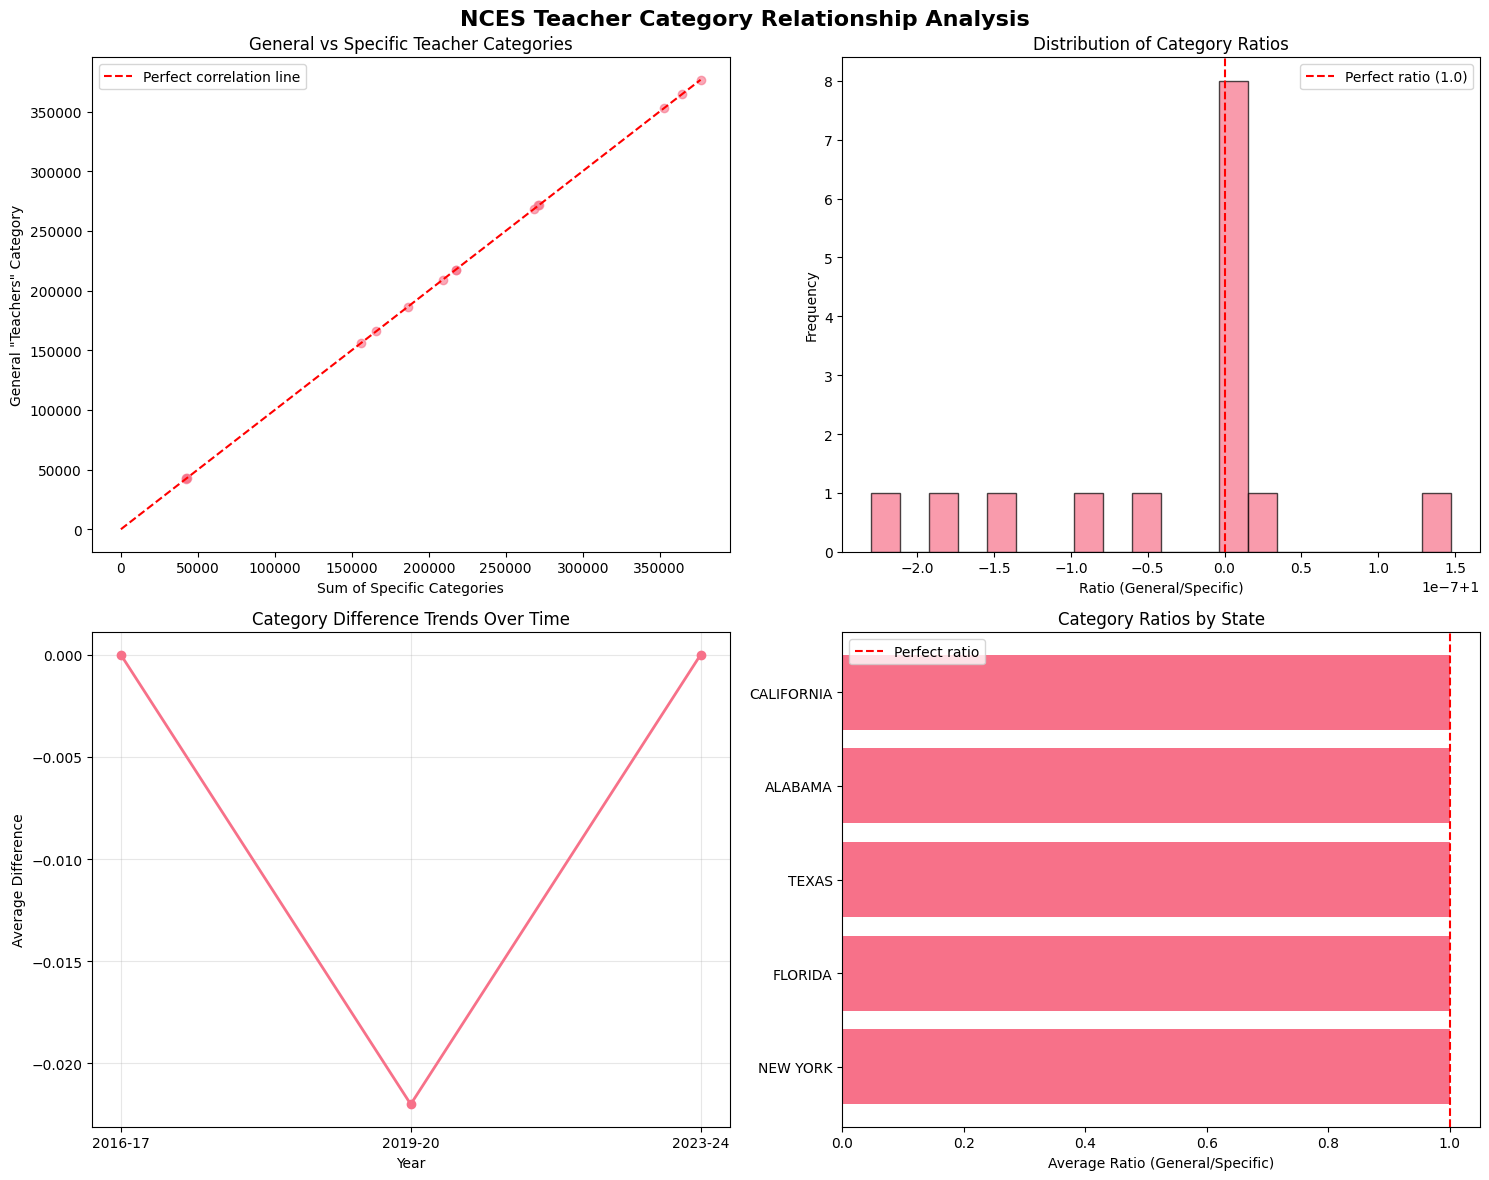


=== Investigation Complete ===
Results saved in returned DataFrame for further analysis


In [31]:
investigation_results = run_complete_category_investigation(combined_df)

In [29]:
print("Columns in combined_df:")
print(combined_df.columns.tolist())
print("\nFirst few rows:")
print(combined_df.head())

Columns in combined_df:
['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SEA_NAME', 'STATE_AGENCY_NO', 'STAFF', 'STAFF_COUNT', 'TOTAL_INDICATOR', 'DMS_FLAG', 'YEAR']

First few rows:
  SCHOOL_YEAR  FIPST STATENAME  ST                         SEA_NAME  \
0   2016-2017      1   ALABAMA  AL  Alabama Department Of Education   
1   2016-2017      1   ALABAMA  AL  Alabama Department Of Education   
2   2016-2017      1   ALABAMA  AL  Alabama Department Of Education   
3   2016-2017      1   ALABAMA  AL  Alabama Department Of Education   
4   2016-2017      1   ALABAMA  AL  Alabama Department Of Education   

   STATE_AGENCY_NO                      STAFF  STAFF_COUNT  \
0                1        Elementary Teachers     16936.40   
1                1      Kindergarten Teachers      4690.95   
2                1  Pre-kindergarten Teachers       848.80   
3                1         Secondary Teachers     20056.80   
4                1                   Teachers     42532.95   

                     